# Libraries and Dependencies

In [8]:
pip install -r requirements.txt

     ---------------------------------------- 1.4/1.4 MB 13.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [66]:
import os
import pandas as pd
import re
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, cross_val_predict

# Directories

In [10]:
# Get current working directory
current_directory = os.getcwd()

# Define the data directory path
data_directory = os.path.join(current_directory, "data")

# Data overview

In [11]:
# List all CSV files in the data directory
csv_files = [f for f in os.listdir(data_directory) if f.endswith('.csv')]

## df1 : 1990 - 1999

In [12]:
first_file = csv_files[0]  # Get the first CSV file
file_path = os.path.join(data_directory, first_file)

# Read into DataFrame
df1 = pd.read_csv(file_path)

# Print file name and its content
print(f"File at Index 0: {first_file}")
df1 

File at Index 0: resale-flat-prices-based-on-approval-date-1990-1999.csv


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287195,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287196,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287197,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287198,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [13]:
df1.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price             int64
dtype: object

## df2 : 2000 - 2012

In [14]:
second_file = csv_files[1]  # Get the second CSV file
file_path = os.path.join(data_directory, second_file)

# Read into DataFrame
df2 = pd.read_csv(file_path)

# Print file name and DataFrame
print(f"\nFile at Index 1: {second_file}")
df2


File at Index 1: resale-flat-prices-based-on-approval-date-2000-feb-2012.csv


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [15]:
df2.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

## df3 : 2015 - 2016

In [16]:
third_file = csv_files[2]  # Get the third CSV file
file_path = os.path.join(data_directory, third_file)

# Read into DataFrame
df3 = pd.read_csv(file_path)

# Print file name and DataFrame
print(f"\nFile at Index 2: {third_file}")
df3  


File at Index 2: resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [17]:
df3.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
dtype: object

## df4 : 2017 onwards

In [18]:
fourth_file = csv_files[3]  # Get the fourth CSV file
file_path = os.path.join(data_directory, fourth_file)

# Read into DataFrame
df4 = pd.read_csv(file_path)

# Print file name and DataFrame
print(f"\nFile at Index 3: {fourth_file}")
df4  


File at Index 3: resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66 years 03 months,440000.0
80370,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65 years 06 months,458000.0
80371,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66 years 04 months,490000.0
80372,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66 years 03 months,558000.0


In [19]:
df4.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

## df5 : 2012 - 2014

In [20]:
fifth_file = csv_files[4]  # Get the fifth CSV file
file_path = os.path.join(data_directory, fifth_file)

# Read into DataFrame
df5 = pd.read_csv(file_path)

# Print file name and DataFrame
print(f"\nFile at Index 4: {fifth_file}")
df5  


File at Index 4: resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [21]:
df5.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

## Observations
1. df1, df2 and df5 are missing remaining_lease column
2. df4's remaining_lease column has a different format (object) than df3
3. storey_range has different intervals for different dataframes

# Data cleaning

## Check for null values

In [22]:
# Check for null values in each DataFrame
for i, df in enumerate([df1, df2, df3, df4, df5], start=1):
    print(f"df{i} contains null values: {df.isnull().values.any()}")


df1 contains null values: False
df2 contains null values: False
df3 contains null values: False
df4 contains null values: False
df5 contains null values: False


## Calculate remaining_lease

In [23]:
# Function to calculate and insert "remaining_lease" column
def calculate_remaining_lease(df):
    if "month" in df.columns and "lease_commence_date" in df.columns:
        # Extract the year from "month" column
        df["year"] = df["month"].astype(str).str[:4].astype(int)
        
        # Compute remaining lease
        df["remaining_lease"] = 99 - (df["year"] - df["lease_commence_date"])
        
        # Drop temporary "year" column
        df.drop(columns=["year"], inplace=True)
        
        # Move "remaining_lease" to the second last column
        cols = list(df.columns)
        cols.insert(-1, cols.pop(cols.index("remaining_lease")))
        df = df[cols]
    
    return df

# Apply function to only df1, df2 and df5
df1 = calculate_remaining_lease(df1)
df2 = calculate_remaining_lease(df2)
df5 = calculate_remaining_lease(df5)

In [24]:
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,86,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,86,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,86,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,86,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,85,47200
...,...,...,...,...,...,...,...,...,...,...,...
287195,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,87,456000
287196,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,88,408000
287197,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,88,469000
287198,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,88,440000


In [25]:
df2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,85,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,85,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,75,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,75,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,75,163000.0
...,...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,72,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,73,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,75,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,79,705000.0


In [26]:
df5

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,73,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,67,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,67,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,71,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,67,321000.0
...,...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,73,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,73,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,77,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,70,592000.0


## Change df4's remaining_lease

In [27]:
# Extract only the years from "remaining_lease" column and convert to int64
df4["remaining_lease"] = df4["remaining_lease"].astype(str).str.extract(r'(\d+)').astype("int64")
df4

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66,440000.0
80370,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65,458000.0
80371,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66,490000.0
80372,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66,558000.0


In [28]:
# Stack all column names and check for differences
columns_df = pd.DataFrame({
    "df1": df1.columns,
    "df2": df2.columns,
    "df3": df3.columns,
    "df4": df4.columns,
    "df5": df5.columns
})

# Check if all columns are identical across DataFrames
if (columns_df.nunique(axis=1) == 1).all():
    print("All DataFrames have the same column names in the same order.")
else:
    print("Mismatch found in column names.")
    print(columns_df)


All DataFrames have the same column names in the same order.


In [29]:
columns_df

,df1,df2,df3,df4,df5
0,month,month,month,month,month
1,town,town,town,town,town
2,flat_type,flat_type,flat_type,flat_type,flat_type
3,block,block,block,block,block
4,street_name,street_name,street_name,street_name,street_name
5,storey_range,storey_range,storey_range,storey_range,storey_range
6,floor_area_sqm,floor_area_sqm,floor_area_sqm,floor_area_sqm,floor_area_sqm
7,flat_model,flat_model,flat_model,flat_model,flat_model
8,lease_commence_date,lease_commence_date,lease_commence_date,lease_commence_date,lease_commence_date
9,remaining_lease,remaining_lease,remaining_lease,remaining_lease,remaining_lease


## Combine dataframes

In [68]:
# Combine df1 to df5 into a single DataFrame chronologically
# df1, df2, df5, df3, df4 (in order of earliest to latest data)
combined_df = pd.concat([df1, df2, df5, df3, df4], ignore_index=True)


In [69]:
combined_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,86,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,86,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,86,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,86,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,85,47200.0
...,...,...,...,...,...,...,...,...,...,...,...
826576,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66,440000.0
826577,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65,458000.0
826578,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66,490000.0
826579,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66,558000.0


In [70]:
for value in sorted(combined_df["town"].unique()):
    print(value)


ANG MO KIO
BEDOK
BISHAN
BUKIT BATOK
BUKIT MERAH
BUKIT PANJANG
BUKIT TIMAH
CENTRAL AREA
CHOA CHU KANG
CLEMENTI
GEYLANG
HOUGANG
JURONG EAST
JURONG WEST
KALLANG/WHAMPOA
LIM CHU KANG
MARINE PARADE
PASIR RIS
PUNGGOL
QUEENSTOWN
SEMBAWANG
SENGKANG
SERANGOON
TAMPINES
TOA PAYOH
WOODLANDS
YISHUN


In [71]:
# Standardize "MULTI GENERATION" and "MULTI-GENERATION" to a single format
combined_df["flat_type"] = combined_df["flat_type"].replace({"MULTI-GENERATION": "MULTI GENERATION"})

for value in sorted(combined_df["flat_type"].unique()):
    print(value)


1 ROOM
2 ROOM
3 ROOM
4 ROOM
5 ROOM
EXECUTIVE
MULTI GENERATION


In [72]:
for value in sorted(combined_df["storey_range"].unique()):
    print(value)


01 TO 03
01 TO 05
04 TO 06
06 TO 10
07 TO 09
10 TO 12
11 TO 15
13 TO 15
16 TO 18
16 TO 20
19 TO 21
21 TO 25
22 TO 24
25 TO 27
26 TO 30
28 TO 30
31 TO 33
31 TO 35
34 TO 36
36 TO 40
37 TO 39
40 TO 42
43 TO 45
46 TO 48
49 TO 51


In [73]:
# Convert all values in the "flat_model" column to uppercase
combined_df["flat_model"] = combined_df["flat_model"].str.upper()

for value in sorted(combined_df["flat_model"].unique()):
    print(value)


2-ROOM
ADJOINED FLAT
APARTMENT
DBSS
IMPROVED
IMPROVED-MAISONETTE
MAISONETTE
MODEL A
MODEL A-MAISONETTE
MODEL A2
MULTI GENERATION
NEW GENERATION
PREMIUM APARTMENT
PREMIUM APARTMENT LOFT
PREMIUM MAISONETTE
SIMPLIFIED
STANDARD
TERRACE
TYPE S1
TYPE S2


In [74]:
# Function to compute the midpoint for storey_range
def convert_storey_range_to_midpoint(df):
    if "storey_range" in df.columns:
        # Extract the lower and upper storey values
        df[["low", "high"]] = df["storey_range"].str.extract(r'(\d+)\s*TO\s*(\d+)').astype(float)

        # Compute the midpoint
        df["storey_range"] = (df["low"] + df["high"]) / 2

        # Drop the temporary columns
        df.drop(columns=["low", "high"], inplace=True)
    
    return df

# Apply the function to combined_df
combined_df = convert_storey_range_to_midpoint(combined_df)

In [75]:
combined_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11.0,31.0,IMPROVED,1977,86,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,5.0,31.0,IMPROVED,1977,86,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11.0,31.0,IMPROVED,1977,86,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,8.0,31.0,IMPROVED,1977,86,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,5.0,73.0,NEW GENERATION,1976,85,47200.0
...,...,...,...,...,...,...,...,...,...,...,...
826576,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,8.0,131.0,IMPROVED,1987,66,440000.0
826577,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,8.0,122.0,IMPROVED,1987,65,458000.0
826578,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,5.0,122.0,IMPROVED,1987,66,490000.0
826579,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,5.0,146.0,MAISONETTE,1987,66,558000.0


In [76]:
for value in sorted(combined_df["storey_range"].unique()):
    print(value)


2.0
3.0
5.0
8.0
11.0
13.0
14.0
17.0
18.0
20.0
23.0
26.0
28.0
29.0
32.0
33.0
35.0
38.0
41.0
44.0
47.0
50.0


In [77]:
# Convert "month" column to datetime format
combined_df["month"] = pd.to_datetime(combined_df["month"], format="%Y-%m")

# Extract year and month into separate columns
combined_df["resale_year"] = combined_df["month"].dt.year
combined_df["resale_month"] = combined_df["month"].dt.month

# Drop original "month" column if no longer needed
combined_df.drop(columns=["month"], inplace=True)

# Reorder columns so "year" is first and "month" is second
column_order = ["resale_year", "resale_month"] + [col for col in combined_df.columns if col not in ["resale_year", "resale_month"]]
combined_df = combined_df[column_order]

combined_df

,resale_year,resale_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11.0,31.0,IMPROVED,1977,86,9000.0
1,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,5.0,31.0,IMPROVED,1977,86,6000.0
2,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11.0,31.0,IMPROVED,1977,86,8000.0
3,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,8.0,31.0,IMPROVED,1977,86,6000.0
4,1990,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,5.0,73.0,NEW GENERATION,1976,85,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2020,9,YISHUN,5 ROOM,716,YISHUN ST 71,8.0,131.0,IMPROVED,1987,66,440000.0
826577,2020,9,YISHUN,5 ROOM,760,YISHUN ST 72,8.0,122.0,IMPROVED,1987,65,458000.0
826578,2020,9,YISHUN,5 ROOM,835,YISHUN ST 81,5.0,122.0,IMPROVED,1987,66,490000.0
826579,2020,9,YISHUN,EXECUTIVE,791,YISHUN AVE 2,5.0,146.0,MAISONETTE,1987,66,558000.0


In [78]:
combined_df.dtypes

resale_year              int64
resale_month             int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range           float64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
dtype: object

In [79]:
# Drop "block" and "street_name" columns from the combined DataFrame
combined_df = combined_df.drop(columns=["block", "street_name"], errors="ignore")

In [80]:
combined_df

,resale_year,resale_month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990,1,ANG MO KIO,1 ROOM,11.0,31.0,IMPROVED,1977,86,9000.0
1,1990,1,ANG MO KIO,1 ROOM,5.0,31.0,IMPROVED,1977,86,6000.0
2,1990,1,ANG MO KIO,1 ROOM,11.0,31.0,IMPROVED,1977,86,8000.0
3,1990,1,ANG MO KIO,1 ROOM,8.0,31.0,IMPROVED,1977,86,6000.0
4,1990,1,ANG MO KIO,3 ROOM,5.0,73.0,NEW GENERATION,1976,85,47200.0
...,...,...,...,...,...,...,...,...,...,...
826576,2020,9,YISHUN,5 ROOM,8.0,131.0,IMPROVED,1987,66,440000.0
826577,2020,9,YISHUN,5 ROOM,8.0,122.0,IMPROVED,1987,65,458000.0
826578,2020,9,YISHUN,5 ROOM,5.0,122.0,IMPROVED,1987,66,490000.0
826579,2020,9,YISHUN,EXECUTIVE,5.0,146.0,MAISONETTE,1987,66,558000.0


## One-hot encoding categorical data
1. town
2. flat_type
3. flat_model

In [81]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

In [82]:
ohetransform = ohe.fit_transform(combined_df[["town", "flat_type", "flat_model"]])

In [83]:
ohetransform

,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,...,flat_model_MULTI GENERATION,flat_model_NEW GENERATION,flat_model_PREMIUM APARTMENT,flat_model_PREMIUM APARTMENT LOFT,flat_model_PREMIUM MAISONETTE,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_TERRACE,flat_model_TYPE S1,flat_model_TYPE S2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
combined_df

,resale_year,resale_month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990,1,ANG MO KIO,1 ROOM,11.0,31.0,IMPROVED,1977,86,9000.0
1,1990,1,ANG MO KIO,1 ROOM,5.0,31.0,IMPROVED,1977,86,6000.0
2,1990,1,ANG MO KIO,1 ROOM,11.0,31.0,IMPROVED,1977,86,8000.0
3,1990,1,ANG MO KIO,1 ROOM,8.0,31.0,IMPROVED,1977,86,6000.0
4,1990,1,ANG MO KIO,3 ROOM,5.0,73.0,NEW GENERATION,1976,85,47200.0
...,...,...,...,...,...,...,...,...,...,...
826576,2020,9,YISHUN,5 ROOM,8.0,131.0,IMPROVED,1987,66,440000.0
826577,2020,9,YISHUN,5 ROOM,8.0,122.0,IMPROVED,1987,65,458000.0
826578,2020,9,YISHUN,5 ROOM,5.0,122.0,IMPROVED,1987,66,490000.0
826579,2020,9,YISHUN,EXECUTIVE,5.0,146.0,MAISONETTE,1987,66,558000.0


In [ ]:
# Drop original "town", "flat_type" and "flat_model" columns from the combined DataFrame and concatenate the one-hot encoded columns
combined_df = pd.concat([combined_df, ohetransform], axis=1).drop(columns=["town", "flat_type", "flat_model"])

# Move "resale_price" to be the last column
column_order = [col for col in combined_df.columns if col != "resale_price"] + ["resale_price"]
combined_df = combined_df[column_order]
combined_df

,resale_year,resale_month,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,...,flat_model_NEW GENERATION,flat_model_PREMIUM APARTMENT,flat_model_PREMIUM APARTMENT LOFT,flat_model_PREMIUM MAISONETTE,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_TERRACE,flat_model_TYPE S1,flat_model_TYPE S2,resale_price
0,1990,1,11.0,31.0,1977,86,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9000.0
1,1990,1,5.0,31.0,1977,86,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.0
2,1990,1,11.0,31.0,1977,86,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8000.0
3,1990,1,8.0,31.0,1977,86,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.0
4,1990,1,5.0,73.0,1976,85,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2020,9,8.0,131.0,1987,66,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440000.0
826577,2020,9,8.0,122.0,1987,65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,458000.0
826578,2020,9,5.0,122.0,1987,66,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490000.0
826579,2020,9,5.0,146.0,1987,66,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,558000.0


In [88]:
print(combined_df.columns)

Index(['resale_year', 'resale_month', 'storey_range', 'floor_area_sqm',
       'lease_commence_date', 'remaining_lease', 'town_ANG MO KIO',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_LIM CHU KANG', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI GENERATION',
       'flat_model_2-ROOM', 'flat_model_ADJOINED FLAT', 'flat_model_APARTMENT',
       'flat_model_DBSS', 'flat_model_IMPROVED',
       'flat_model_IMPRO

# Exploratory data analysis

## Continous variables

In [63]:
# Select only the continuous variables
continuous_vars = ['resale_year', 'resale_month', 'storey_range', 
                   'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'resale_price']

# Generate descriptive statistics for the continuous variables
continuous_summary = combined_df[continuous_vars].describe().round(2)

# Display the results
continuous_summary


,resale_year,resale_month,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
count,826581.00,826581.00,826581.00,826581.00,826581.00,826581.00,826581.00
mean,2004.23,6.57,7.54,95.56,1987.15,81.85,293548.99
std,7.93,3.39,4.62,26.06,9.45,9.87,148753.60
min,1990.00,1.00,2.00,28.00,1966.00,45.00,5000.00
25%,1998.00,4.00,5.00,73.00,1980.00,75.00,181000.00
50%,2003.00,7.00,8.00,93.00,1986.00,83.00,275000.00
75%,2010.00,9.00,11.00,114.00,1994.00,90.00,383000.00
max,2020.00,12.00,50.00,307.00,2019.00,101.00,1258000.00


### Boxplot, histogram, violinplot

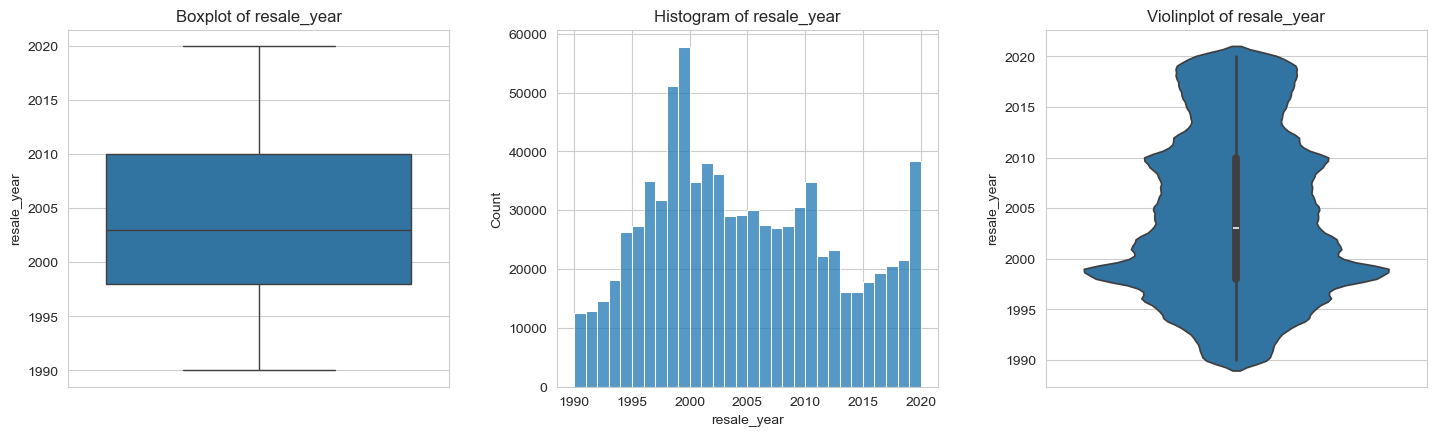

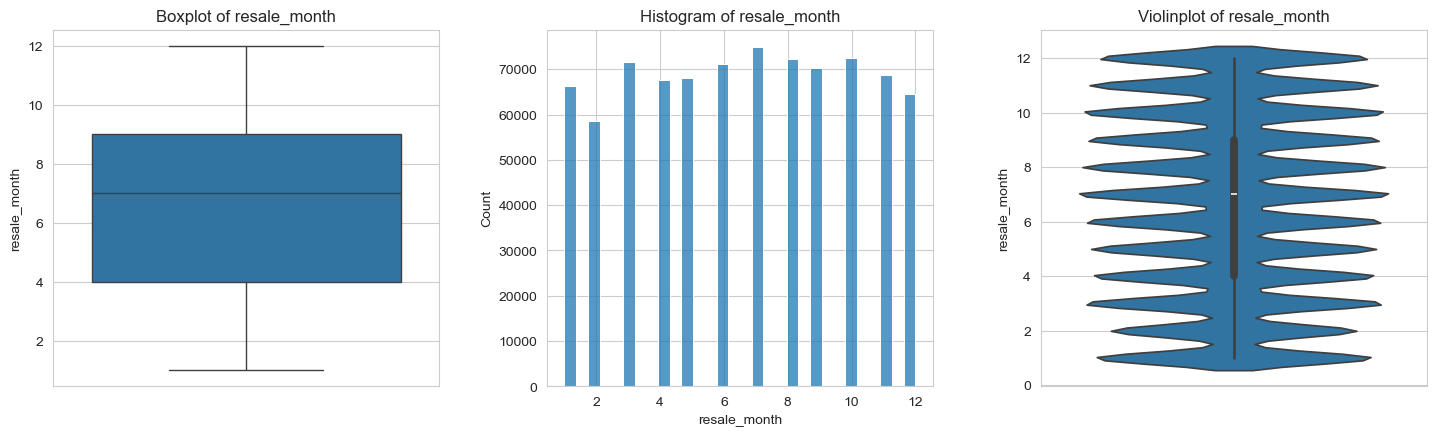

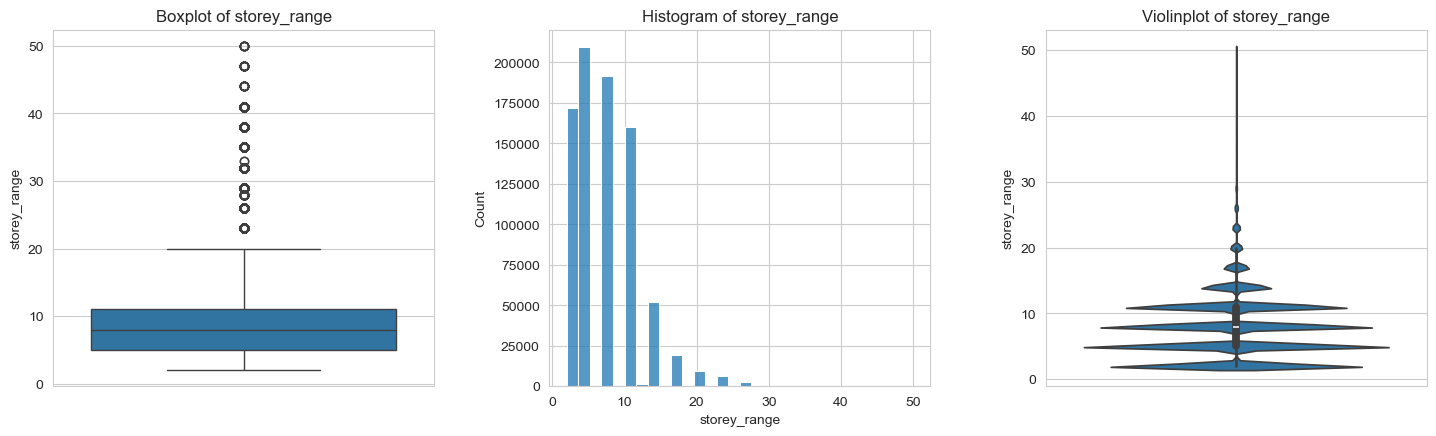

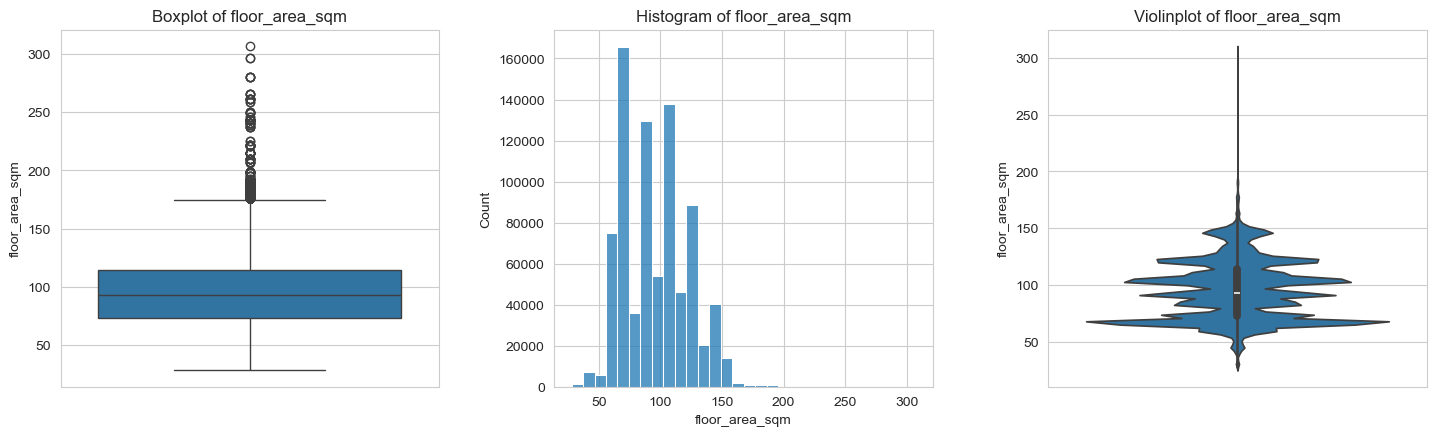

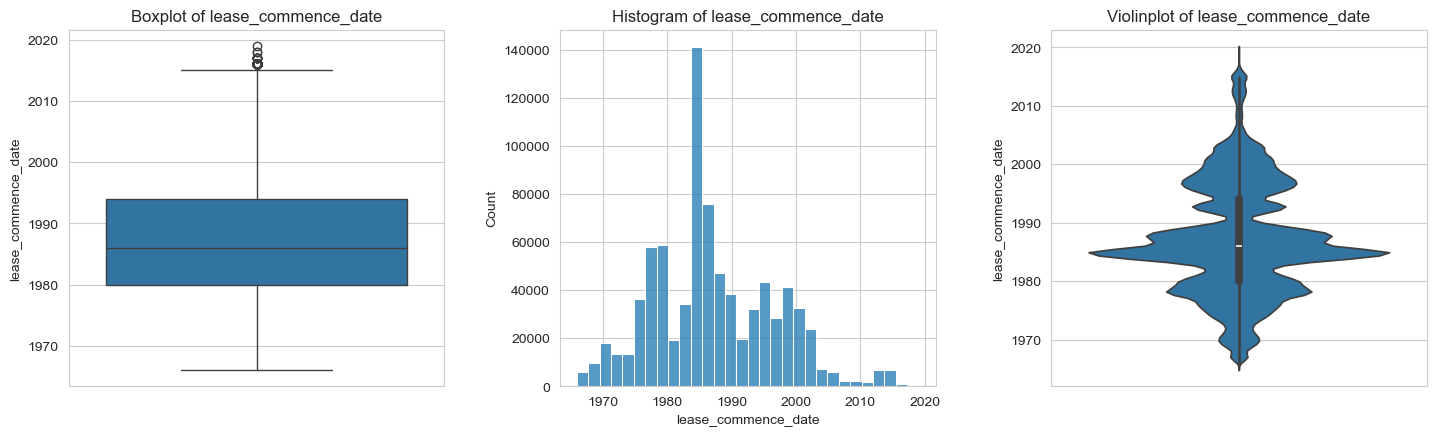

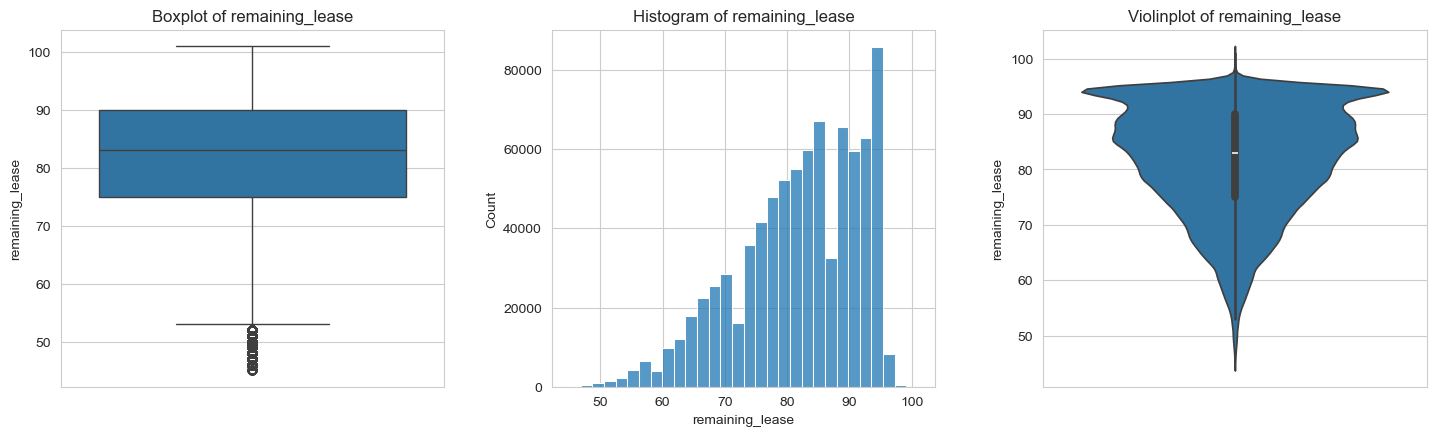

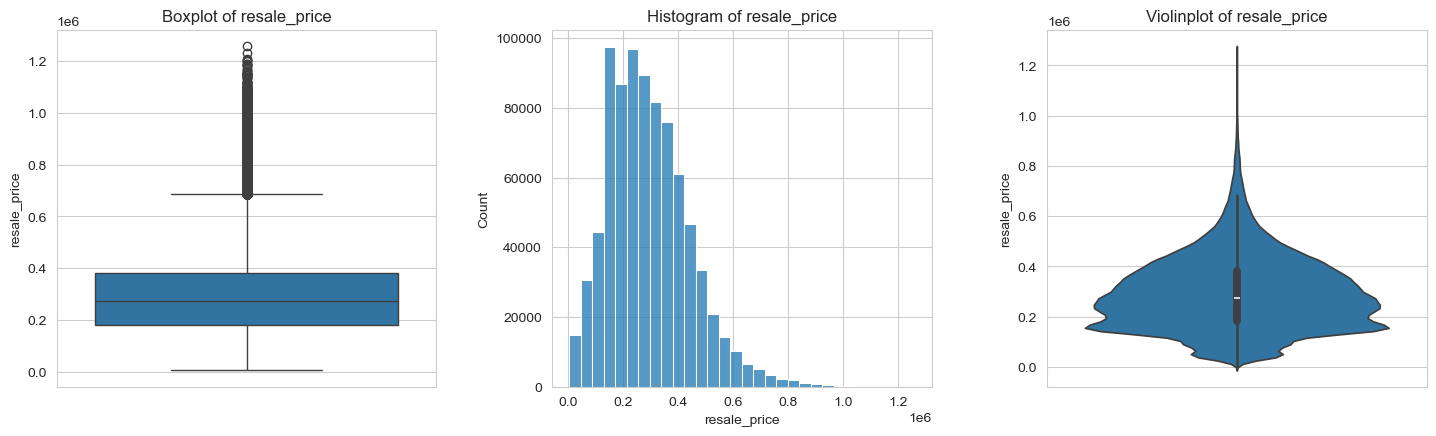

In [71]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Define continuous variables
continuous_vars = ['resale_year', 'resale_month', 'storey_range', 
                   'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'resale_price']

# Loop through each continuous variable and plot distributions
for column in continuous_vars:
    plt.figure(figsize=(15, 5))  # Increase figure width for more space
    
    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(y=combined_df[column])
    plt.title(f'Boxplot of {column}')
    
    # Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(combined_df[column], bins=30)
    plt.title(f'Histogram of {column}')
    
    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(y=combined_df[column])
    plt.title(f'Violinplot of {column}')
    
    plt.tight_layout(pad=3.0)  # Increase padding between subplots
    plt.show()

### Correlation heatmap

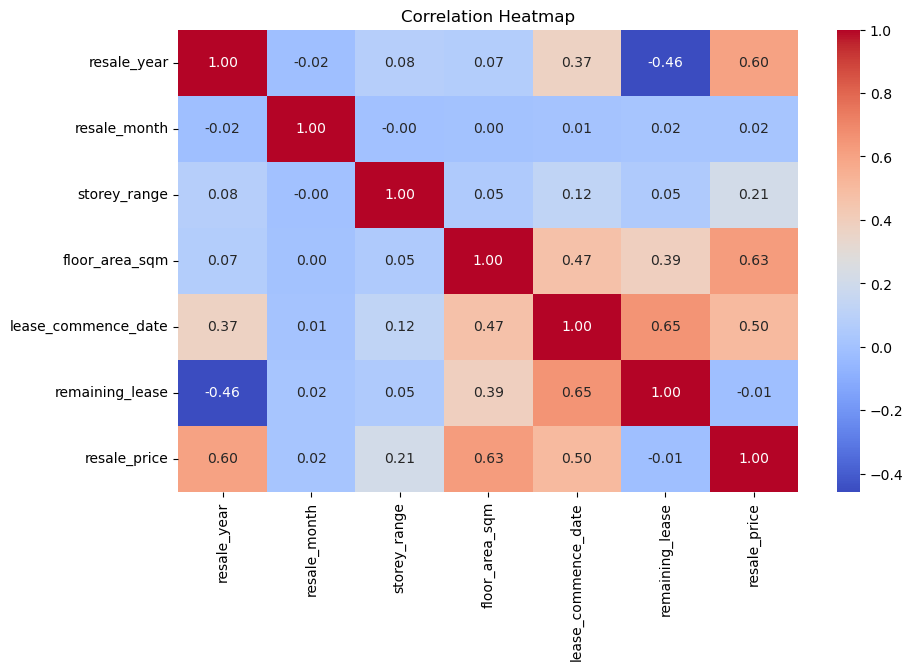

In [70]:
# Correlation heatmap
correlation_matrix = combined_df[continuous_vars].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Scatterplots with respect to resale price

## Categorical variables (town, flat_type, flat_model)

### Boxplot
Sorted by alphabetical order

<Figure size 1500x600 with 0 Axes>

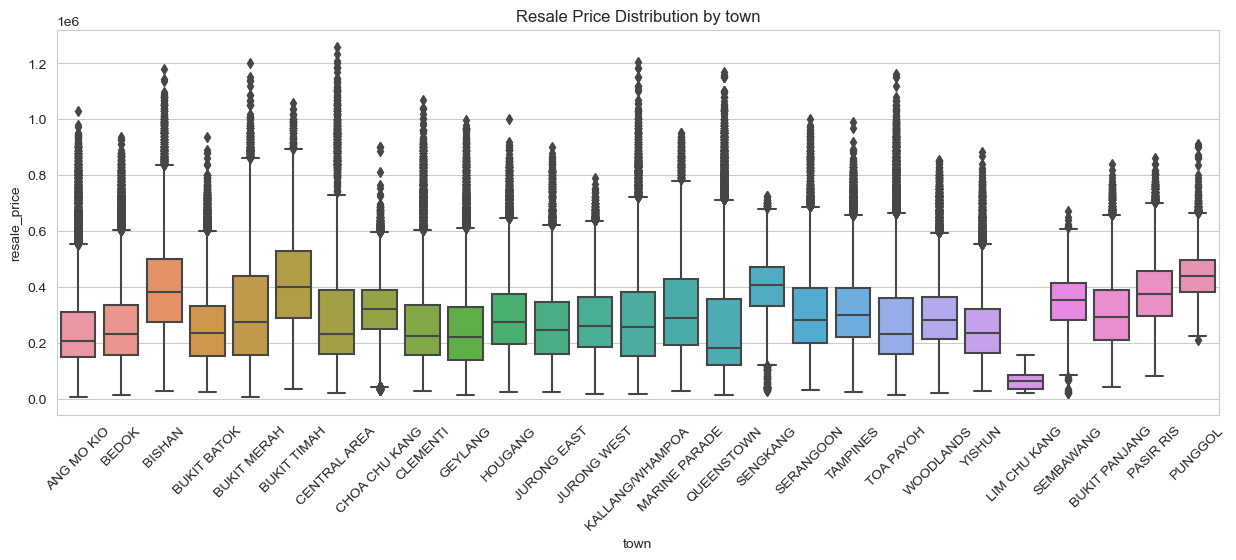

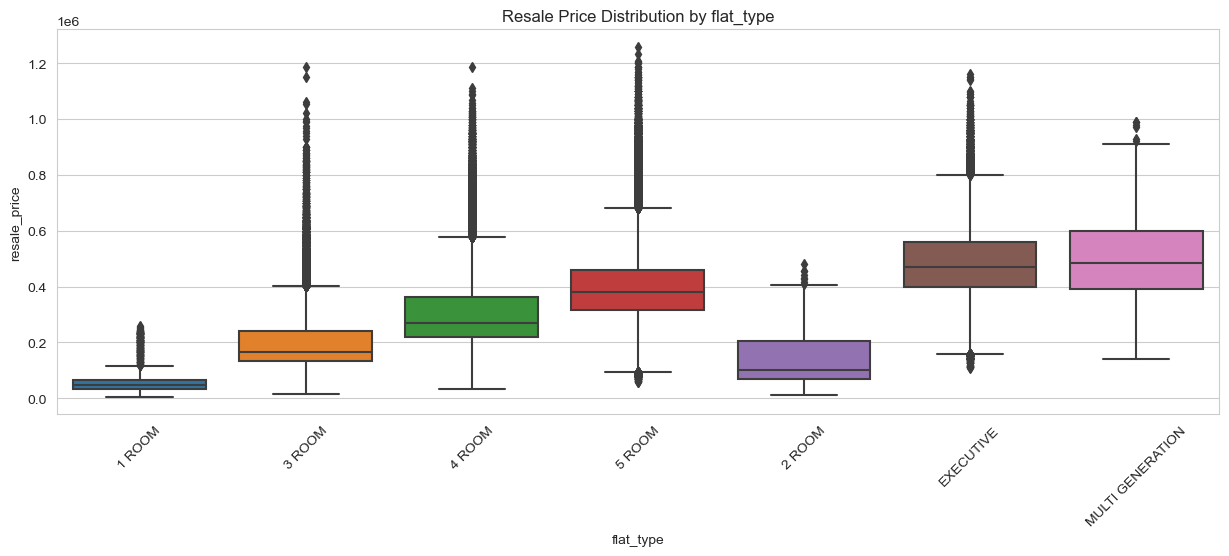

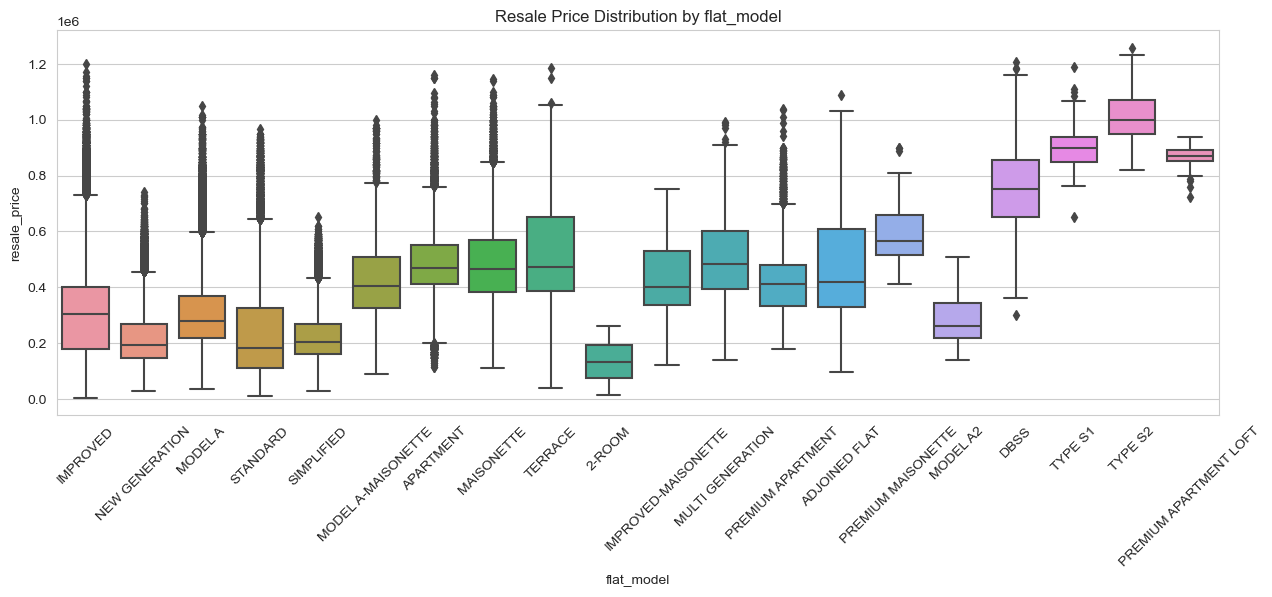

In [ ]:
# Convert one-hot encoded columns back to categorical variables
categorical_features = ['town', 'flat_type', 'flat_model']  # Original categorical columns

# Create categorical columns by mapping one-hot encoded features
for feature in categorical_features:
    # Extract the base feature name (e.g., 'town_' from 'town_ANG MO KIO')
    base_feature = [col for col in combined_df.columns if col.startswith(feature + "_")]
    
    # Find the max one-hot encoded column for each row (assigns category back)
    combined_df[feature] = combined_df[base_feature].idxmax(axis=1).str[len(feature) + 1:]

# Boxplots for categorical variables vs. resale_price
plt.figure(figsize=(15, 6))
for i, feature in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=combined_df, x=feature, y='resale_price')
    plt.xticks(rotation=45)
    plt.title(f'Resale Price Distribution by {feature}')
    plt.show()

### Barchart
Sorted by ascending mean resale price

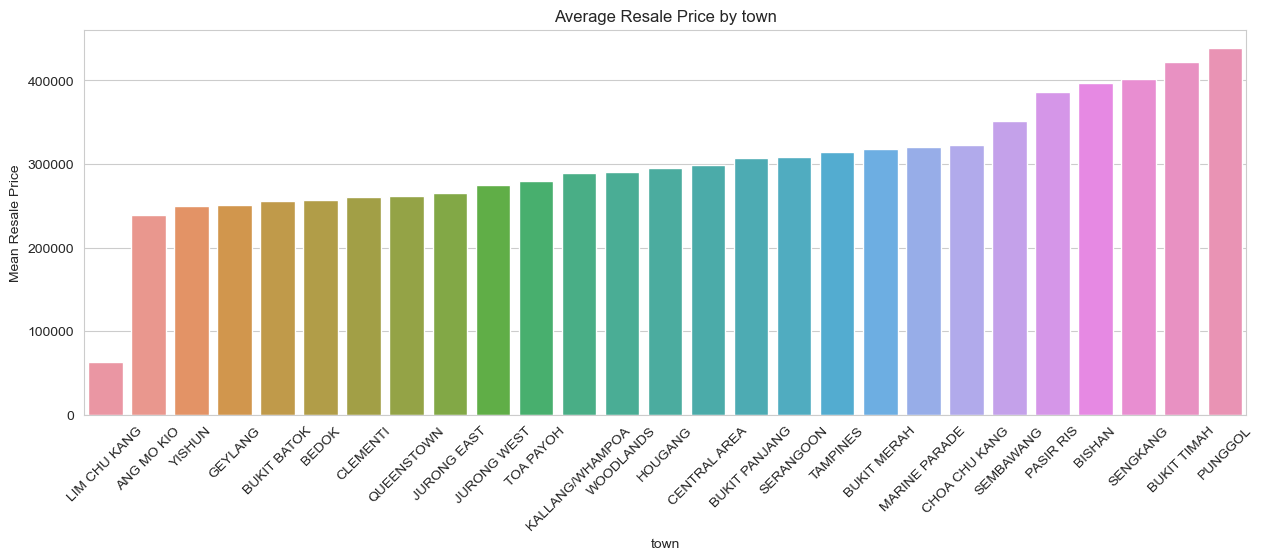

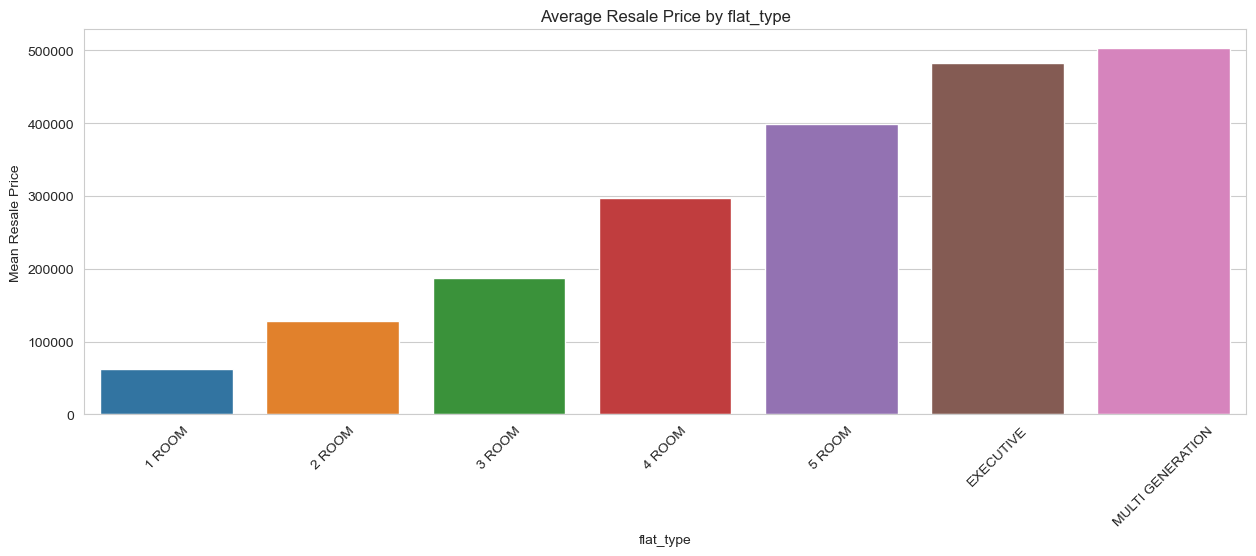

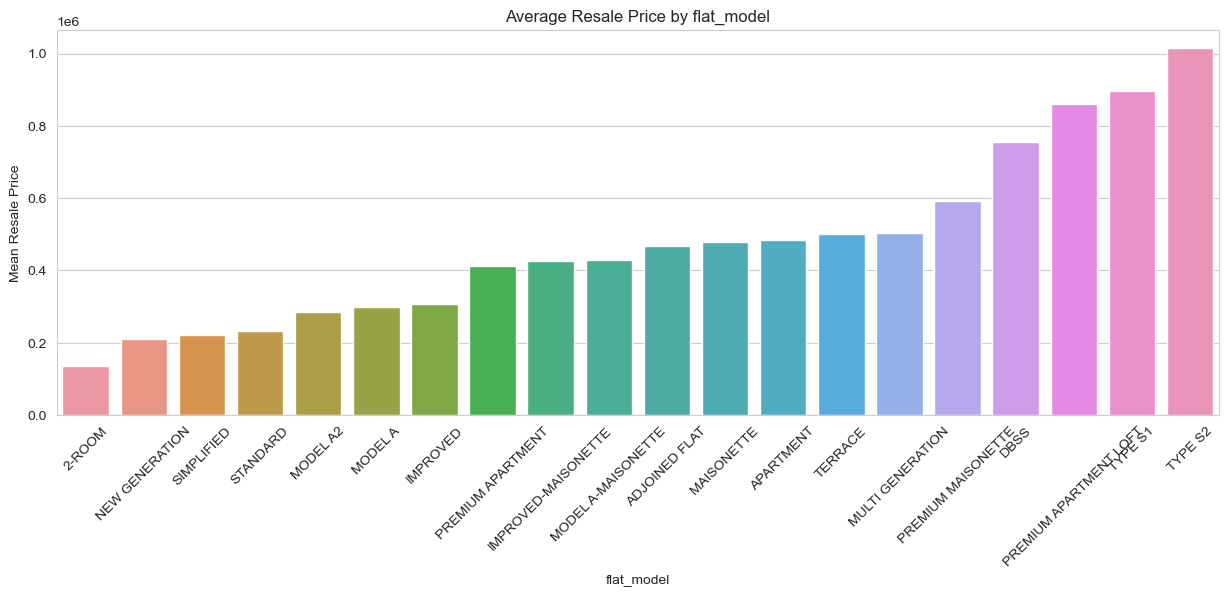

In [96]:
# Mean resale price for each categorical variable
for feature in categorical_features:
    category_mean = combined_df.groupby(feature)['resale_price'].mean().sort_values()
    
    plt.figure(figsize=(15, 5))
    sns.barplot(x=category_mean.index, y=category_mean.values)
    plt.xticks(rotation=45)
    plt.title(f'Average Resale Price by {feature}')
    plt.ylabel('Mean Resale Price')
    plt.xlabel(feature)
    plt.show()

### Heatmap of mean resale prices by town and flat type

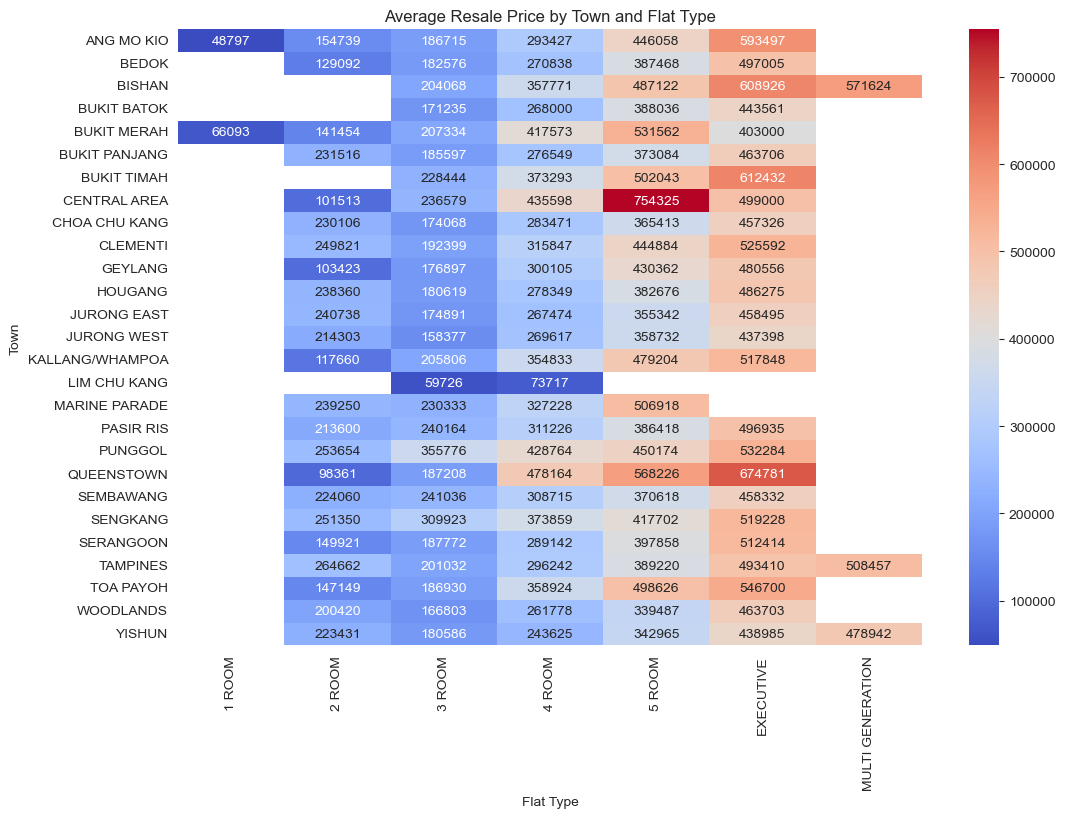

In [95]:
# Heatmap of mean resale prices across categories
heatmap_data = combined_df.groupby(['town', 'flat_type'])['resale_price'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Average Resale Price by Town and Flat Type")
plt.ylabel("Town")
plt.xlabel("Flat Type")
plt.show()

# Training and prediction

## Model selection
1. 

In [ ]:
X = combined_df.drop(columns=["resale_price"])  # Features
y = combined_df["resale_price"]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [50]:
# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
}

# Define 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
cv_results = {}

for name, model in models.items():
    # Compute RMSE scores
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    rmse_scores = np.sqrt(-mse_scores)  # Convert negative MSE to RMSE

    # Compute R² scores
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2', n_jobs=-1)

    # Compute MAE scores
    mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
    mae_scores = -mae_scores  # Convert negative MAE to positive

    # Store results
    cv_results[name] = {
        "Mean RMSE": np.mean(rmse_scores),
        "Std RMSE": np.std(rmse_scores),
        "Mean R² Score": np.mean(r2_scores),
        "Std R² Score": np.std(r2_scores),
        "Mean MAE": np.mean(mae_scores),
        "Std MAE": np.std(mae_scores)
    }

# Convert results to DataFrame for easy viewing
cv_results_df = pd.DataFrame(cv_results).T

# Display results
print(cv_results_df)

                  Mean RMSE    Std RMSE  Mean R² Score  Std R² Score  \
Random Forest  22852.197775   96.354711       0.976398      0.000247   
XGBoost        29645.654189  107.727977       0.960279      0.000452   
LightGBM       28573.728505   57.255419       0.963102      0.000161   
CatBoost       36237.164381  195.457959       0.940654      0.000656   

                   Mean MAE     Std MAE  
Random Forest  15621.385572   36.120930  
XGBoost        20780.925962  102.097870  
LightGBM       20070.559025   51.676829  
CatBoost       25514.751590  127.402916  


## Hyperparameter tuning of model using GridSearchCV

In [ ]:
# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2]  # Minimum number of samples in a leaf node
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with 3-Fold Cross-Validation for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=3,  # 3-fold cv for faster results
    verbose=1,
    n_jobs=-1  
)

# Fit Grid Search to Training Data
grid_search.fit(X, y)

# Retrieve Best Hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Define 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store fold results
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform 5-Fold Cross-Validation with the best hyperparameters 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the best model on the training fold
    best_rf_model = RandomForestRegressor(**best_params, random_state=42)
    best_rf_model.fit(X_train, y_train)

    # Make predictions on the test fold
    y_pred = best_rf_model.predict(X_test)

    # Calculate RMSE, MAE, and R² for the fold
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Store cross-validation results in a DataFrame
cv_results_tuned = pd.DataFrame([{
    "Best Parameters": best_params,
    "Mean CV RMSE": np.mean(rmse_scores),
    "Std CV RMSE": np.std(rmse_scores),
    "Mean CV MAE": np.mean(mae_scores),
    "Std CV MAE": np.std(mae_scores),
    "Mean CV R² Score": np.mean(r2_scores),
    "Std CV R² Score": np.std(r2_scores)
}])

# Display results
print("5-Fold CV Results with Best Random Forest Model:")
print(cv_results_tuned)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
5-Fold CV Results with Best Random Forest Model:
                                     Best Parameters  Mean CV RMSE  \
0  {'max_depth': None, 'min_samples_leaf': 1, 'mi...  22443.810899   

   Std CV RMSE   Mean CV MAE  Std CV MAE  Mean CV R² Score  Std CV R² Score  
0    99.464261  15310.505318   39.224181          0.977234         0.000246  


## Feature importance

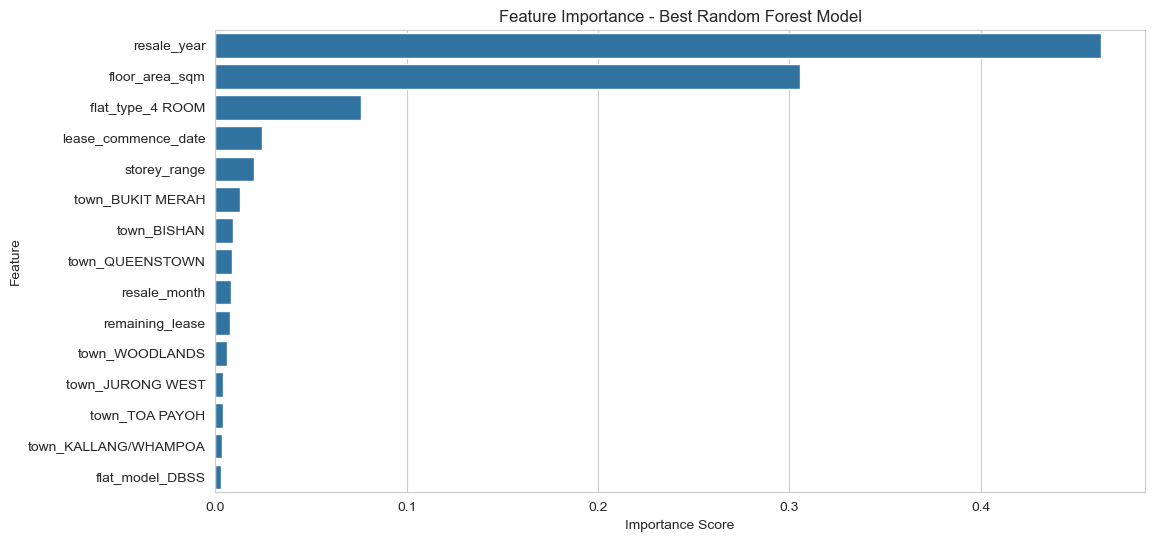

In [73]:
# Get feature importances from the best trained Random Forest model
feature_importance = best_rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df[:15])  # Show top 15 features
plt.title("Feature Importance - Best Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()